In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import tree
#modelli 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression, BayesianRidge, Ridge, Lasso, SGDRegressor, LinearRegression
from sklearn.ensemble import RandomForestRegressor



from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [85]:
df_wine= pd.read_csv("winequality-white.csv",delimiter=';')
df_wine.head(4)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [98]:
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [86]:
df_wine['quality'].unique()


array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [87]:
y = df_wine['quality']
X = df_wine[[i for i in list(df_wine.columns) if i != 'quality']]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.21, random_state=42)

In [88]:
decisionTree = tree.DecisionTreeClassifier(criterion='entropy',max_depth=4)
decisionTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [89]:
decisionTree.score(X_test,y_test)

0.5072886297376094

In [90]:
labels_unique = y.unique().tolist()
labels_unique.sort()
labels_unique


[3, 4, 5, 6, 7, 8, 9]

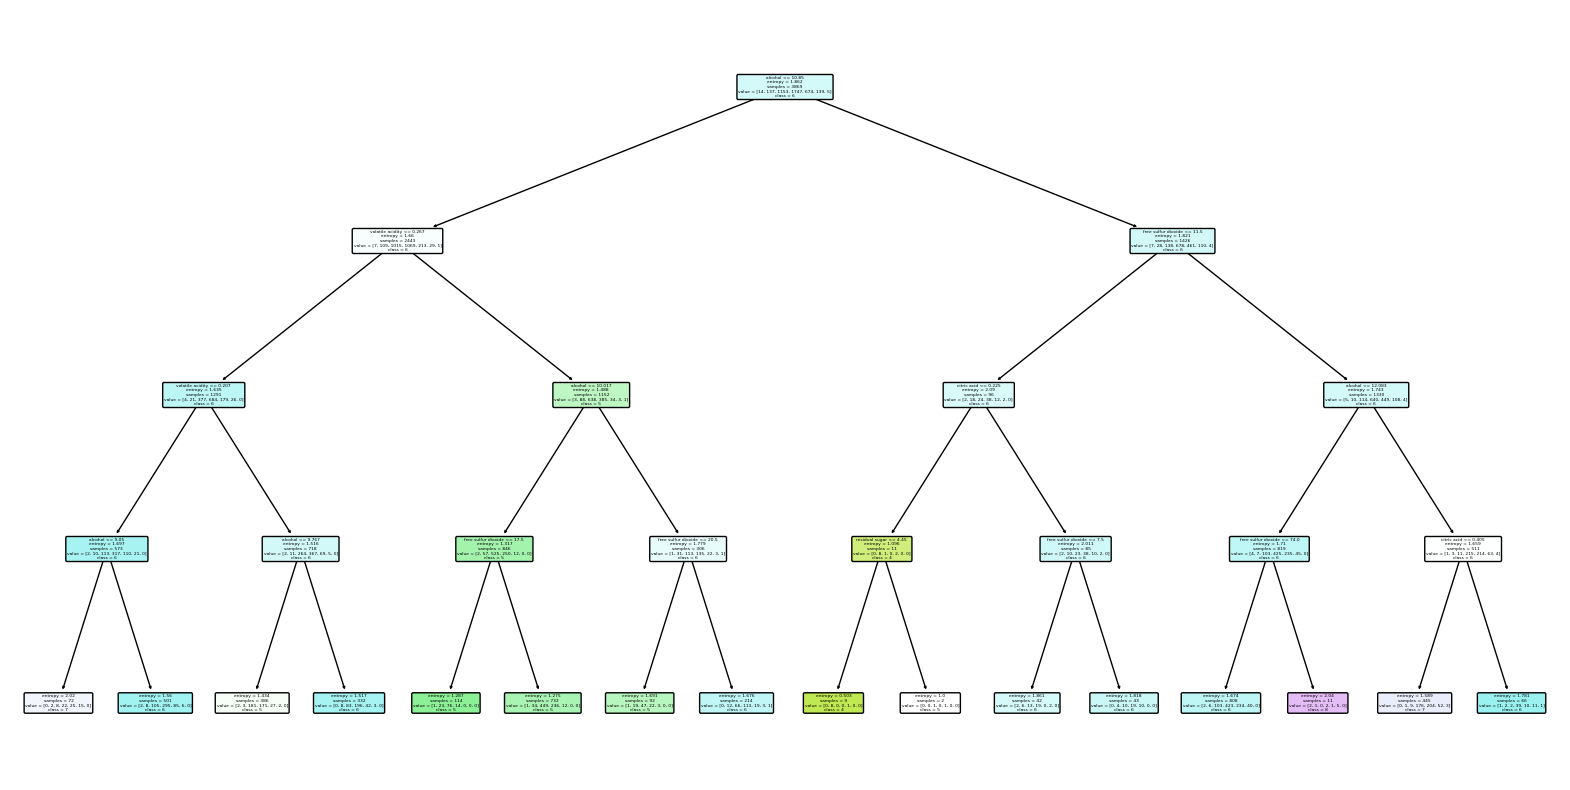

In [91]:
plt.figure(figsize=(20,10))
tree.plot_tree(decisionTree,
                feature_names=X.columns.to_list(),
                class_names=[str(x) for x in labels_unique],
                filled=True,rounded=True)
plt.show()

In [94]:
df_wine['quality'].value_counts()

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

In [95]:
decisionTree_pond = tree.DecisionTreeClassifier(criterion='entropy',class_weight={3:1,4:2,5:4,6:5,7:3,8:2,9:1})
decisionTree_pond.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={3: 1, 4: 2, 5: 4, 6: 5, 7: 3, 8: 2, 9: 1},
                       criterion='entropy')

In [96]:
decisionTree_pond.score(X_test,y_test)

0.5928085519922255

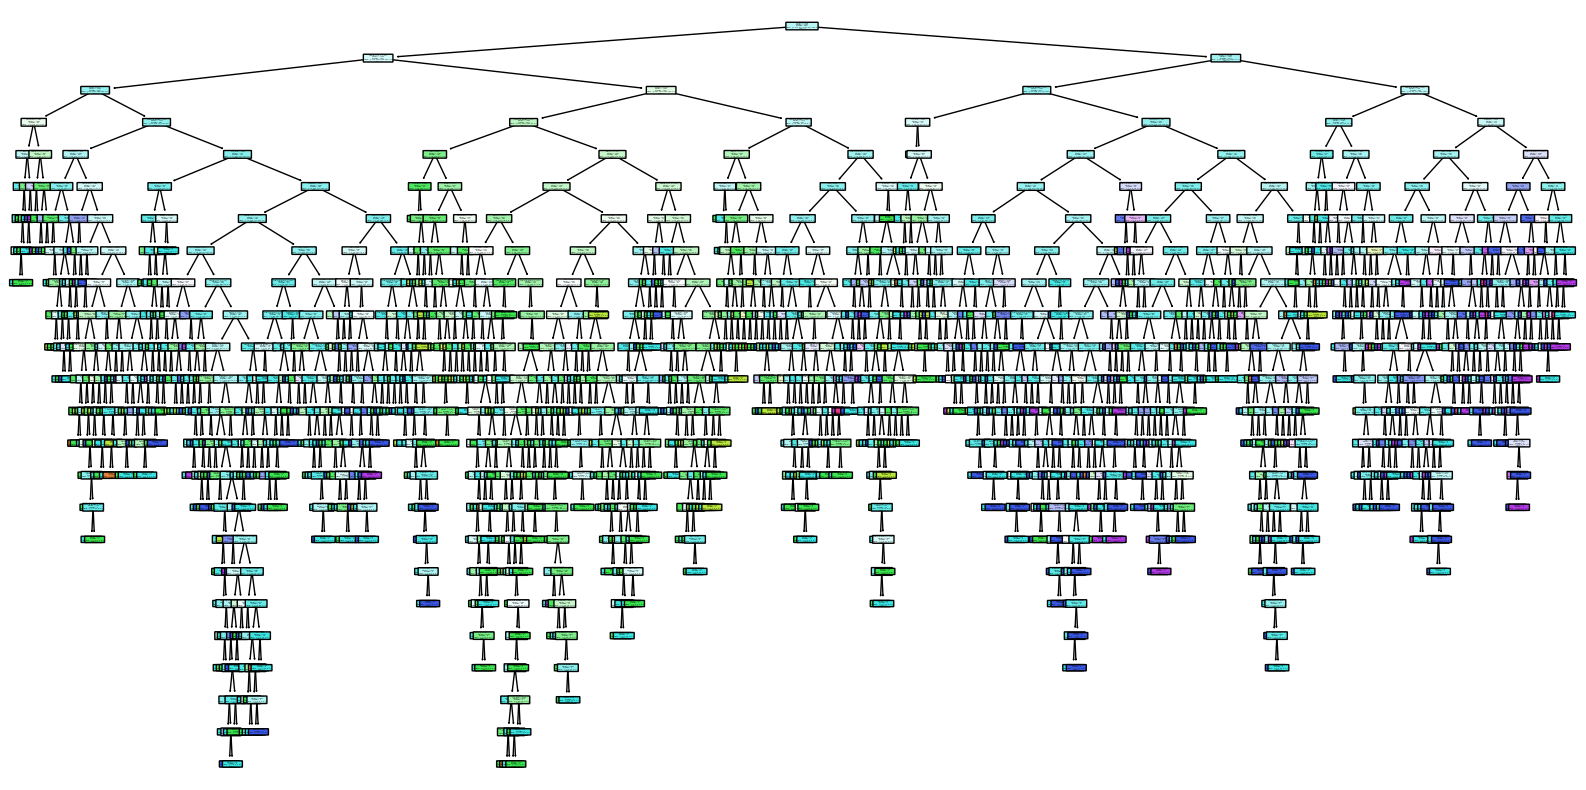

In [97]:
plt.figure(figsize=(20,10))
tree.plot_tree(decisionTree_pond,
                feature_names=X.columns.to_list(),
                class_names=[str(x) for x in labels_unique],
                filled=True,rounded=True)
plt.show()

Risultati della convalida incrociata:
Punteggio medio:  0.5251969741033793


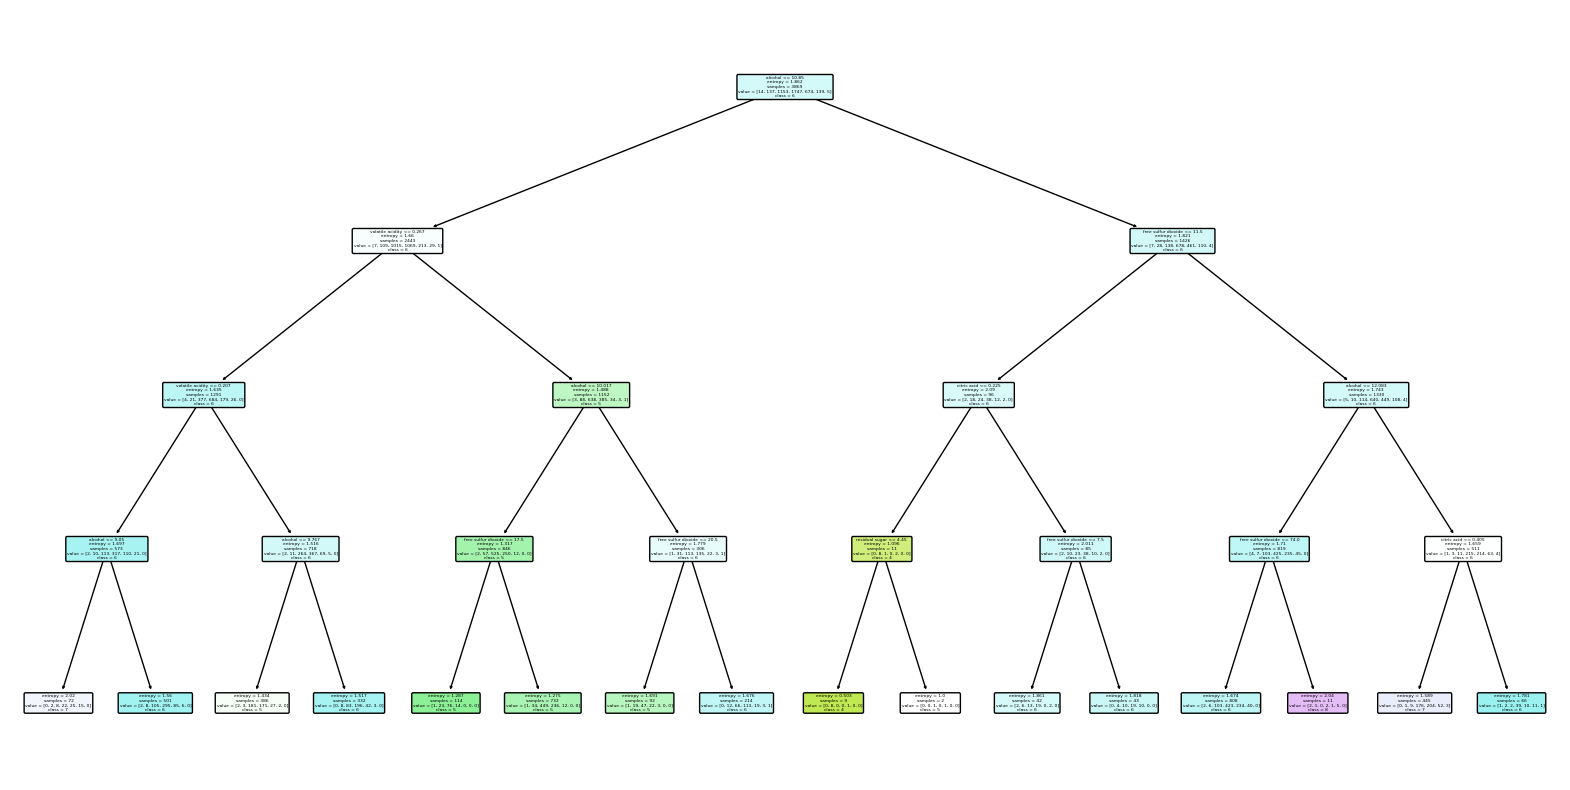

In [113]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression 


model = tree.DecisionTreeClassifier(criterion='entropy',max_depth=4)
model.fit(X_train,y_train)
scores = cross_val_score(model, X_train, y_train, cv=5) 
print("Risultati della convalida incrociata:")
print("Punteggio medio: ", scores.mean())
plt.figure(figsize=(20,10))
tree.plot_tree(model,
                feature_names=X.columns.to_list(),
                class_names=[str(x) for x in labels_unique],
                filled=True,rounded=True)
plt.show()